In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

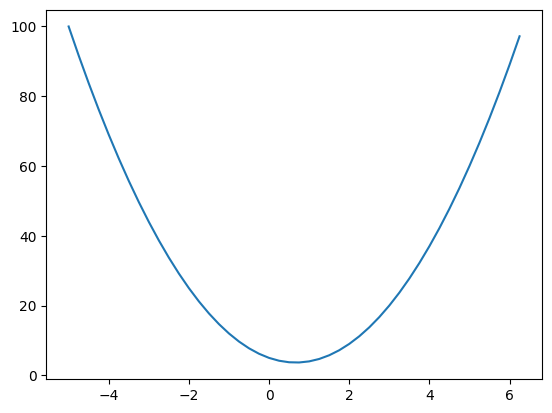

In [4]:
xs = np.arange(-5, 6.5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [44]:
class Value:

    def __init__(self, data, _children = (), _operation = "", label = ""):
        self.data = data
        self._prev = set(_children)
        self._operation = _operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda : None

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        addition = self.data + other.data
        children = (self, other)
        operation = " add "
        result = Value(data = addition, _children = children, _operation = operation)

        def backward():
            self.grad = 1.0 * result.grad
            other.grad = 1.0 * result.grad

        self._backward = backward
        
        return result

    def __mul__(self, other):
        multiplication = self.data * other.data
        children = (self, other)
        operation = " mul "
        result = Value(data = multiplication, _children = children, _operation = operation)

        def backward():
            self.grad = other.data * result.grad
            other.grad = self.data * result.grad

        self._backward = backward
        
        return result

    def tanh(self):
        x = self.data
        operation = " tanh "
        children = (self, )
        tanh = (math.exp(2 * x) - 1) / (math.exp(2 * x) + 1)
        result = Value(data = tanh, _children = children, _operation = operation)

        def backward():
            self.grad = (1.0 - tanh * tanh) * result.grad

        self._backward = backward
        
        return result


In [6]:
from graphviz import Digraph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape="record")
    if n._operation:
      dot.node(name = uid + n._operation, label = n._operation)
      dot.edge(uid + n._operation, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

  return dot

In [36]:
a = Value(data = 2.0, label = "a")
b = Value(data = -3.0, label = "b")
c = Value(data = 10.0, label = "c")
e = a * b; e.label = "e"
d = e + c; d.label = "d"
f = Value(-2.0, label = "f")
L = d * f; L.label = "L"
L

Value(data = -8.0)

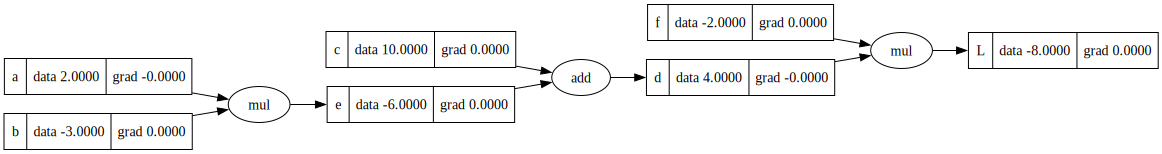

In [37]:
draw_dot(L)

Lets make simple neuron

In [45]:
x1 = Value(data = 2.0, label = "x1")
w1 = Value(data = -3.0, label = "w1")
x2 = Value(data = 0.0, label = "x2")
w2 = Value(data = 1.0, label = "w2")
b = Value(data = 6.8813735870195432, label = "bias")

x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"

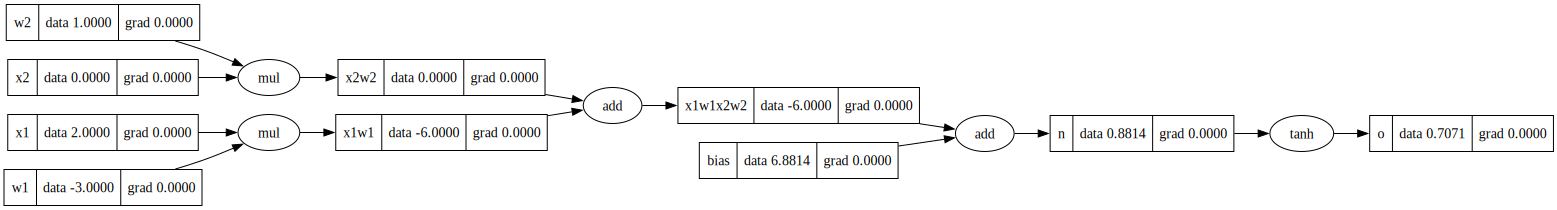

In [46]:
draw_dot(o)

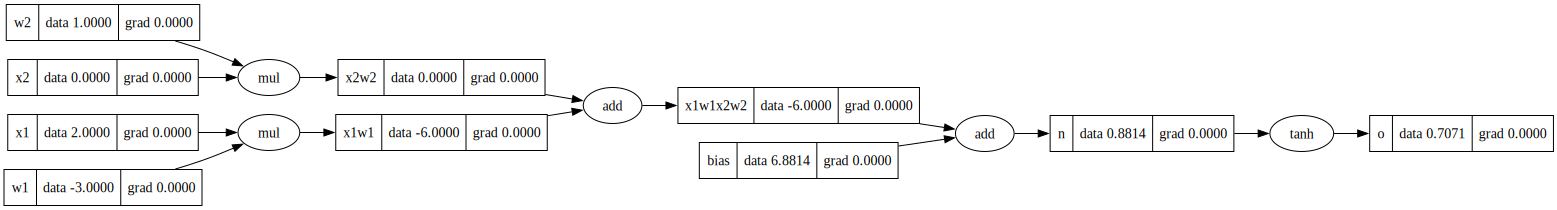

In [48]:
o.grad = 1.0

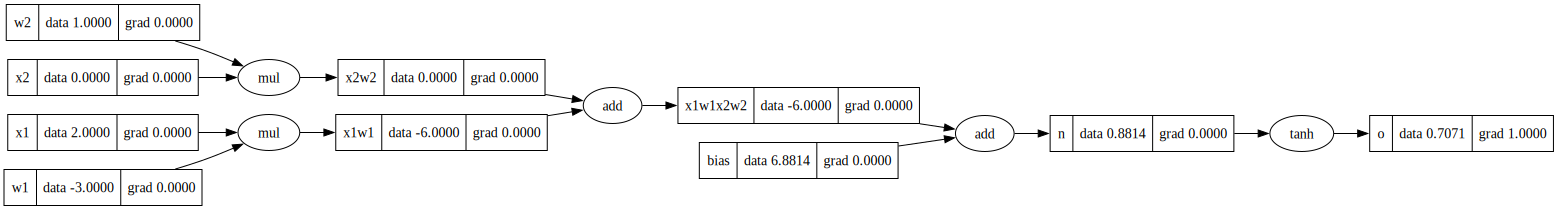

In [49]:
draw_dot(o)